# Capstone Project

# Where in Toronto
### Srivaishnavi Korukanti

###### Introduction

Ontario is the most populous province in Canada and Toronto is provincial capital of Ontario. Toronto is the most populous city in Canada and the fourth most populous city in North America. As per 2016, the population of Greater Toronto Area (GTA) is 6,417,516. Toronto is an international center of business, finance, arts, culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world. Toronto has a diverse population as it is an important destination for most immigrants coming into Canada. People belonging to around 200 different ethnic groups reside in Toronto area. 
Toronto serves as the financial capital of Canada and hosts high concentration of banks and brokerage firms in the financial district area. The five largest financial institutions in Canada known as Big Five (Royal Bank of Canada (RBC), Toronto-Dominion Bank (TD), Bank of Nova Scotia (Scotiabank), Bank of Montreal(BMO), Canadian Imperial Bank of Commerce(CIBC)) have national offices in Toronto. Toronto serves as headquarters for many companies such as Bell Media, Rogers Communications and Torstar. Toronto is also home to software companies such as Ecobee, Shopify, Amazon, Paytm Labs etc. There are many universities in Toronto such as University of Toronto in downtown area and there are three other universities present in the same area. The downtown Toronto also hosts many hospitals such as the Sick Kids Hospital and Mount Sinai hospital." 


Toronto is also the prominent center for music, theatre, motion picture and television production. It is a popular tourist destination attracting lot of people from all over the world for these. The most popular tourist attractions in Toronto are Royal Canadian Museum, CN tower, Toronto Zoo and Hockey hall of fame. There are numerous galleries and museums in Toronto to visit. 
Everyday thousands of people come to Toronto for various purposes and it is important for them to know about good hotels to stay in downtown Toronto. 


###### Problem
The information about hotels located in downtown Toronto and their ratings can help one decide about where to stay while in Toronto. With lot of companies in downtown Toronto, these hotels would help them stay close to the workplace. Downtown Toronto is busiest part of the city with large number of neighborhoods. People visiting Toronto would love to know about good hotels and their locations in Toronto. Any firm interested in building a new hotel would like to know about the current hotels in the area and their ratings. 

###### Beneficiaries
The information about good hotels in downtown Toronto would be useful to someone who wants to find answers to the following questions:

1. What are the good hotels to stay in downtown Toronto?
2. Which neighborhoods in downtown Toronto would be ideal to build a new hotel?

In [4]:
import numpy as np #Library to handle data in a vectorized manner
import pandas as pd #Library for data analysis
import json #Library to handle JSON files

In [5]:
from geopy.geocoders import Nominatim #convert an address to latitude and longitude values
import requests  #Library to handle requests

In [6]:
from pandas.io.json import json_normalize #transform JSON file into pandas dataframe 

In [7]:
import matplotlib.cm as cm #Matplotlib and associated plotting modules
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [10]:
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text #getting the list of postal codes from wikipedia

In [11]:
from bs4 import BeautifulSoup # using the BeautifulSoup package to scrap the data
soup = BeautifulSoup(source, 'lxml')

In [12]:
table = soup.find('table', class_='wikitable sortable' )

In [13]:
Headers = ['PostalCode', 'Borough', 'Neighborhood'] # creating the dataframe with three required coumns
df = pd.DataFrame(columns = Headers)


In [14]:
for tr in table.find_all('tr'):
    row = []
    for td in tr.find_all('td'):
        row.append(td.text.strip())
        if len(row)==3:
            df.loc[len(df)] = row 

In [15]:
df.head() # showing top 5 valus of the dataframe

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [16]:
df = df.drop(df[(df.Borough == 'Not assigned')].index)# dropping a row
df.head()


,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [17]:
df.Neighborhood.replace("Not assigned", df.Borough, inplace = True) # replace Not assigned with Borough name

In [18]:
df = df.groupby(['PostalCode', 'Borough'], sort = False).agg(','.join) # Joining all neighbourhood in one Postal Code
df = df.reset_index()
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [19]:
LL_toronto = pd.read_csv("https://cocl.us/Geospatial_data")#Reading the values from the csv file
LL_toronto.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [20]:
LL_toronto.rename(columns = {'Postal Code' : 'PostalCode'}, inplace = True) #Renaming Postal Code to PostalCode
LL_toronto.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [21]:
Toronto = pd.merge(df, LL_toronto, on = 'PostalCode') #Merging two dataframes on PostalCode value
Toronto

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [22]:
Toronto.groupby('Borough')['Neighborhood'].count() # Counting number of Neighbourhoods in each Borough

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          24
Scarborough         17
West Toronto         6
York                 5
Name: Neighborhood, dtype: int64

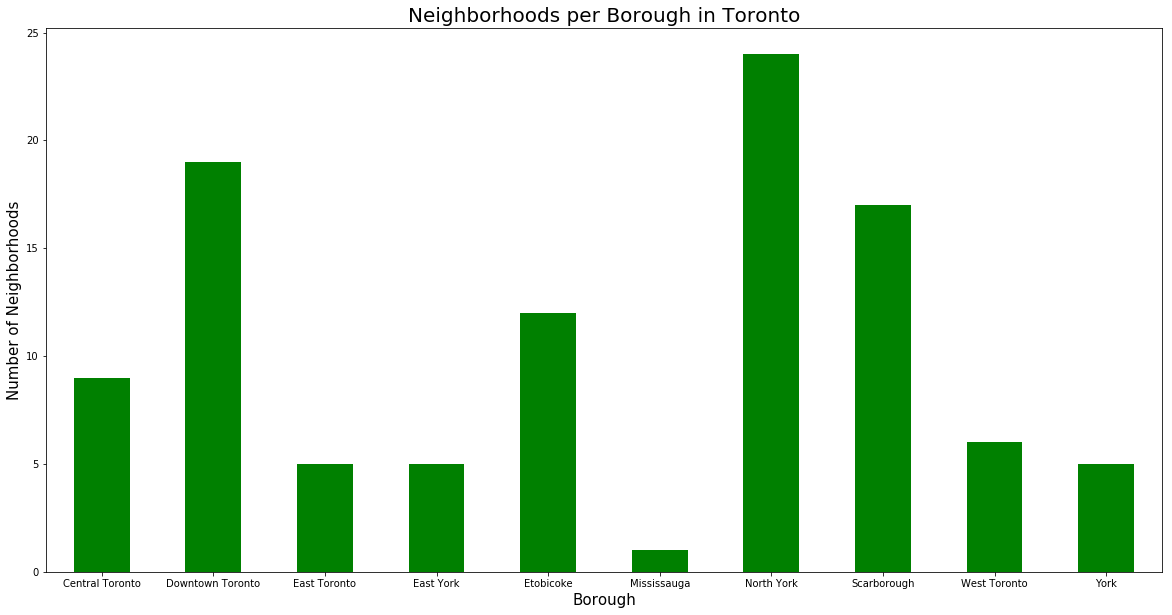

In [23]:
Toronto.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(20,10), color="green") # Plotting the Bar graph
plt.title('Neighborhoods per Borough in Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Number of Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [24]:
geolocator = Nominatim(user_agent="to_explorer") # Obtaining Latitude and Longitude values
location = geolocator.geocode("Toronto")
LATITUDE = location.latitude
LONGITUDE = location.longitude
print('The geographical Coordinates of Toronto are {}, {}.'.format(LATITUDE,LONGITUDE))

The geographical Coordinates of Toronto are 43.6534817, -79.3839347.


In [25]:
!pip install folium #map rendering library
import folium

     |████████████████████████████████| 102kB 8.4MB/s ta 0:00:011


In [26]:
map_toronto = folium.Map(location=[LATITUDE,LONGITUDE], zoom_start = 10) # Generating Map of Toronto
for lat, lng, borough, neighborhood in zip(Toronto['Latitude'], Toronto['Longitude'], Toronto['Borough'], Toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood,borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat,lng],
    radius = 5,
    popup = label,
    color = 'blue',
    fill = True,
    fill_color = '#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
    
    
map_toronto    
    

In [27]:
CLIENT_ID = 'YCSCUTEWXS2BWBQJ4UMBQX1EN4SPLSA2BXTZ0RNJ40MHFRO4' # Setting up values of Foursquare API Credentials
CLIENT_SECRET = '0Y2VZ0TQJGNQ1CASDQAQMKUAHCE34DFXMHBZONNHLNKHB5GC'
VERSION = '20180605'
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CLIENT_ID: YCSCUTEWXS2BWBQJ4UMBQX1EN4SPLSA2BXTZ0RNJ40MHFRO4
CLIENT_SECRET:0Y2VZ0TQJGNQ1CASDQAQMKUAHCE34DFXMHBZONNHLNKHB5GC


In [28]:
search_query = 'Hotel'# Searching for a hotel
radius = 5000
limit = 100

In [29]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,LATITUDE,LONGITUDE,VERSION,search_query,radius,limit)
url

'https://api.foursquare.com/v2/venues/search?client_id=YCSCUTEWXS2BWBQJ4UMBQX1EN4SPLSA2BXTZ0RNJ40MHFRO4&client_secret=0Y2VZ0TQJGNQ1CASDQAQMKUAHCE34DFXMHBZONNHLNKHB5GC&ll=43.6534817,-79.3839347&v=20180605&query=Hotel&radius=5000&limit=100'

In [30]:
results = requests.get(url).json() # Obtaining results using GET
results

{'meta': {'code': 200, 'requestId': '5ef8d17d6c350d49250c3f11'},
 'response': {'venues': [{'id': '4ab2d511f964a5209b6c20e3',
    'name': 'Sheraton Centre Toronto Hotel',
    'location': {'address': '123 Queen Street West',
     'crossStreet': 'at York St.',
     'lat': 43.6505944,
     'lng': -79.3845298,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.6505944,
       'lng': -79.3845298}],
     'distance': 324,
     'postalCode': 'M5H 2M9',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['123 Queen Street West (at York St.)',
      'Toronto ON M5H 2M9',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1593365253',
    'hasPerk': False},
   {'id': '4ad4c05b

In [31]:
venues = results['response']['venues'] # Getting the venues
dataframe = json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4ab2d511f964a5209b6c20e3,123 Queen Street West,CA,Toronto,Canada,at York St.,324,"[123 Queen Street West (at York St.), Toronto ...","[{'label': 'display', 'lat': 43.6505944, 'lng'...",43.650594,-79.384530,NaN,M5H 2M9,ON,Sheraton Centre Toronto Hotel,v-1593365253,NaN
1,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4ad4c05bf964a520a3f520e3,65 Dundas St E,CA,Toronto,Canada,at Bond St.,534,"[65 Dundas St E (at Bond St.), Toronto ON M5B ...","[{'label': 'display', 'lat': 43.65618805882607...",43.656188,-79.378452,NaN,M5B 2G8,ON,Bond Place Hotel,v-1593365253,NaN
2,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,51d212c3498ebf27dc469bc9,33 Gerrard Street West,CA,Toronto,Canada,at Yonge St,562,"[33 Gerrard Street West (at Yonge St), Toronto...","[{'label': 'display', 'lat': 43.65849759157591...",43.658498,-79.383097,NaN,M5G 1Z4,ON,Chelsea Hotel,v-1593365253,NaN
3,"[{'id': '4bf58dd8d48988d1e7931735', 'name': 'J...",False,4b68aed1f964a520de862be3,194 Queen St W,CA,Toronto,Canada,Queen & St. Patrick,499,"[194 Queen St W (Queen & St. Patrick), Toronto...","[{'label': 'display', 'lat': 43.65050475544005...",43.650505,-79.388577,NaN,M5V 1Z1,ON,The Rex Hotel Jazz & Blues Bar,v-1593365253,62225795
4,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4adf7d0bf964a520127b21e3,37 King Street East,CA,Toronto,Canada,bwtn Victoria St. and Toronto St.,797,[37 King Street East (bwtn Victoria St. and To...,"[{'label': 'display', 'lat': 43.64919051601911...",43.649191,-79.376006,NaN,M5C 1E9,ON,The Omni King Edward Hotel,v-1593365253,51136538
5,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4ae61cf6f964a520caa421e3,200 Victoria St,CA,Toronto,Canada,at Shuter St,410,"[200 Victoria St (at Shuter St), Toronto ON, C...","[{'label': 'display', 'lat': 43.65449797039222...",43.654498,-79.379035,NaN,NaN,ON,Pantages Hotel & Spa,v-1593365253,NaN
6,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4af96fbbf964a520c01122e3,1 King St W,CA,Toronto,Canada,at Yonge St.,686,"[1 King St W (at Yonge St.), Toronto ON M5H 1A...","[{'label': 'display', 'lat': 43.6491395, 'lng'...",43.649139,-79.377876,NaN,M5H 1A1,ON,One King West Hotel & Residence,v-1593365253,NaN
7,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,51e48697498eded9073c6c17,33 Gerrard Street West,CA,Toronto,Canada,NaN,522,"[33 Gerrard Street West, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65809435580944...",43.658094,-79.382711,NaN,NaN,ON,Crew Room Eaton Chelsea Hotel,v-1593365253,NaN
8,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4f343a31e4b0230a3b337a90,123 Test Drive,CA,Toronto,Canada,at somewhere St,636,"[123 Test Drive (at somewhere St), Toronto ON ...","[{'label': 'display', 'lat': 43.658434, 'lng':...",43.658434,-79.387894,NaN,M2M 2M2,ON,VFM Test Hotel,v-1593365253,NaN
9,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,5c118557b9ac38002cd72ff8,26 Gerrard Street East,CA,Toronto,Canada,NaN,706,"[26 Gerrard Street East, Toronto ON M5B 1G3, C...","[{'label': 'display', 'lat': 43.6594656, 'lng'...",43.659466,-79.380994,NaN,M5B 1G3,ON,"The Saint James Hotel, Ascend Hotel Collection",v-1593365253,NaN


In [32]:
filtered_columns = ['name','categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

In [33]:
def  get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    
dataframe_filtered


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Sheraton Centre Toronto Hotel,Hotel,123 Queen Street West,CA,Toronto,Canada,at York St.,324,"[123 Queen Street West (at York St.), Toronto ...","[{'label': 'display', 'lat': 43.6505944, 'lng'...",43.650594,-79.384530,NaN,M5H 2M9,ON,4ab2d511f964a5209b6c20e3
1,Bond Place Hotel,Hotel,65 Dundas St E,CA,Toronto,Canada,at Bond St.,534,"[65 Dundas St E (at Bond St.), Toronto ON M5B ...","[{'label': 'display', 'lat': 43.65618805882607...",43.656188,-79.378452,NaN,M5B 2G8,ON,4ad4c05bf964a520a3f520e3
2,Chelsea Hotel,Hotel,33 Gerrard Street West,CA,Toronto,Canada,at Yonge St,562,"[33 Gerrard Street West (at Yonge St), Toronto...","[{'label': 'display', 'lat': 43.65849759157591...",43.658498,-79.383097,NaN,M5G 1Z4,ON,51d212c3498ebf27dc469bc9
3,The Rex Hotel Jazz & Blues Bar,Jazz Club,194 Queen St W,CA,Toronto,Canada,Queen & St. Patrick,499,"[194 Queen St W (Queen & St. Patrick), Toronto...","[{'label': 'display', 'lat': 43.65050475544005...",43.650505,-79.388577,NaN,M5V 1Z1,ON,4b68aed1f964a520de862be3
4,The Omni King Edward Hotel,Hotel,37 King Street East,CA,Toronto,Canada,bwtn Victoria St. and Toronto St.,797,[37 King Street East (bwtn Victoria St. and To...,"[{'label': 'display', 'lat': 43.64919051601911...",43.649191,-79.376006,NaN,M5C 1E9,ON,4adf7d0bf964a520127b21e3
5,Pantages Hotel & Spa,Hotel,200 Victoria St,CA,Toronto,Canada,at Shuter St,410,"[200 Victoria St (at Shuter St), Toronto ON, C...","[{'label': 'display', 'lat': 43.65449797039222...",43.654498,-79.379035,NaN,NaN,ON,4ae61cf6f964a520caa421e3
6,One King West Hotel & Residence,Hotel,1 King St W,CA,Toronto,Canada,at Yonge St.,686,"[1 King St W (at Yonge St.), Toronto ON M5H 1A...","[{'label': 'display', 'lat': 43.6491395, 'lng'...",43.649139,-79.377876,NaN,M5H 1A1,ON,4af96fbbf964a520c01122e3
7,Crew Room Eaton Chelsea Hotel,Hotel,33 Gerrard Street West,CA,Toronto,Canada,NaN,522,"[33 Gerrard Street West, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65809435580944...",43.658094,-79.382711,NaN,NaN,ON,51e48697498eded9073c6c17
8,VFM Test Hotel,Hotel,123 Test Drive,CA,Toronto,Canada,at somewhere St,636,"[123 Test Drive (at somewhere St), Toronto ON ...","[{'label': 'display', 'lat': 43.658434, 'lng':...",43.658434,-79.387894,NaN,M2M 2M2,ON,4f343a31e4b0230a3b337a90
9,"The Saint James Hotel, Ascend Hotel Collection",Hotel,26 Gerrard Street East,CA,Toronto,Canada,NaN,706,"[26 Gerrard Street East, Toronto ON M5B 1G3, C...","[{'label': 'display', 'lat': 43.6594656, 'lng'...",43.659466,-79.380994,NaN,M5B 1G3,ON,5c118557b9ac38002cd72ff8


In [34]:
df1 = dataframe_filtered.drop(['cc', 'state','distance','crossStreet','formattedAddress','postalCode','labeledLatLngs','address','city','country','neighborhood'], axis=1) # Dropping unwanted columns
df1

,name,categories,lat,lng,id
0,Sheraton Centre Toronto Hotel,Hotel,43.650594,-79.384530,4ab2d511f964a5209b6c20e3
1,Bond Place Hotel,Hotel,43.656188,-79.378452,4ad4c05bf964a520a3f520e3
2,Chelsea Hotel,Hotel,43.658498,-79.383097,51d212c3498ebf27dc469bc9
3,The Rex Hotel Jazz & Blues Bar,Jazz Club,43.650505,-79.388577,4b68aed1f964a520de862be3
4,The Omni King Edward Hotel,Hotel,43.649191,-79.376006,4adf7d0bf964a520127b21e3
5,Pantages Hotel & Spa,Hotel,43.654498,-79.379035,4ae61cf6f964a520caa421e3
6,One King West Hotel & Residence,Hotel,43.649139,-79.377876,4af96fbbf964a520c01122e3
7,Crew Room Eaton Chelsea Hotel,Hotel,43.658094,-79.382711,51e48697498eded9073c6c17
8,VFM Test Hotel,Hotel,43.658434,-79.387894,4f343a31e4b0230a3b337a90
9,"The Saint James Hotel, Ascend Hotel Collection",Hotel,43.659466,-79.380994,5c118557b9ac38002cd72ff8


In [35]:
df_new = df1.drop(df1[(df1.categories != 'Hotel')].index)# dropping unwanted rows
df_new

,name,categories,lat,lng,id
0,Sheraton Centre Toronto Hotel,Hotel,43.650594,-79.384530,4ab2d511f964a5209b6c20e3
1,Bond Place Hotel,Hotel,43.656188,-79.378452,4ad4c05bf964a520a3f520e3
2,Chelsea Hotel,Hotel,43.658498,-79.383097,51d212c3498ebf27dc469bc9
4,The Omni King Edward Hotel,Hotel,43.649191,-79.376006,4adf7d0bf964a520127b21e3
5,Pantages Hotel & Spa,Hotel,43.654498,-79.379035,4ae61cf6f964a520caa421e3
6,One King West Hotel & Residence,Hotel,43.649139,-79.377876,4af96fbbf964a520c01122e3
7,Crew Room Eaton Chelsea Hotel,Hotel,43.658094,-79.382711,51e48697498eded9073c6c17
8,VFM Test Hotel,Hotel,43.658434,-79.387894,4f343a31e4b0230a3b337a90
9,"The Saint James Hotel, Ascend Hotel Collection",Hotel,43.659466,-79.380994,5c118557b9ac38002cd72ff8
10,Beverley Hotel,Hotel,43.649701,-79.392114,51e9e8b3498e8b2a4c63f58b


In [36]:
df_new.rename(columns = {'lat' : 'Latitude', 'lng' : 'Longitude'}, inplace = True) #Changing lat to Latitude and lng to Longitude
df_new

,name,categories,Latitude,Longitude,id
0,Sheraton Centre Toronto Hotel,Hotel,43.650594,-79.384530,4ab2d511f964a5209b6c20e3
1,Bond Place Hotel,Hotel,43.656188,-79.378452,4ad4c05bf964a520a3f520e3
2,Chelsea Hotel,Hotel,43.658498,-79.383097,51d212c3498ebf27dc469bc9
4,The Omni King Edward Hotel,Hotel,43.649191,-79.376006,4adf7d0bf964a520127b21e3
5,Pantages Hotel & Spa,Hotel,43.654498,-79.379035,4ae61cf6f964a520caa421e3
6,One King West Hotel & Residence,Hotel,43.649139,-79.377876,4af96fbbf964a520c01122e3
7,Crew Room Eaton Chelsea Hotel,Hotel,43.658094,-79.382711,51e48697498eded9073c6c17
8,VFM Test Hotel,Hotel,43.658434,-79.387894,4f343a31e4b0230a3b337a90
9,"The Saint James Hotel, Ascend Hotel Collection",Hotel,43.659466,-79.380994,5c118557b9ac38002cd72ff8
10,Beverley Hotel,Hotel,43.649701,-79.392114,51e9e8b3498e8b2a4c63f58b


In [37]:
df_new = df_new.reset_index(drop = True) # Reset the Dataframe

In [38]:
map_Hotel = folium.Map(location=[LATITUDE,LONGITUDE], zoom_start = 10) # Generating Map of Toronto
for lat, lng, name, id in zip(df_new['Latitude'], df_new['Longitude'], df_new['name'], df_new['id']):
    label = '{}, {}'.format(id, name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat,lng],
    radius = 5,
    popup = label,
    color = 'blue',
    fill = True,
    fill_color = '#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_Hotel)
    
    
map_Hotel    

In [39]:
df_new = df_new.round({'Latitude' : 2, 'Longitude': 2}) # Rounding the decimal to two points
df_new

,name,categories,Latitude,Longitude,id
0,Sheraton Centre Toronto Hotel,Hotel,43.65,-79.38,4ab2d511f964a5209b6c20e3
1,Bond Place Hotel,Hotel,43.66,-79.38,4ad4c05bf964a520a3f520e3
2,Chelsea Hotel,Hotel,43.66,-79.38,51d212c3498ebf27dc469bc9
3,The Omni King Edward Hotel,Hotel,43.65,-79.38,4adf7d0bf964a520127b21e3
4,Pantages Hotel & Spa,Hotel,43.65,-79.38,4ae61cf6f964a520caa421e3
5,One King West Hotel & Residence,Hotel,43.65,-79.38,4af96fbbf964a520c01122e3
6,Crew Room Eaton Chelsea Hotel,Hotel,43.66,-79.38,51e48697498eded9073c6c17
7,VFM Test Hotel,Hotel,43.66,-79.39,4f343a31e4b0230a3b337a90
8,"The Saint James Hotel, Ascend Hotel Collection",Hotel,43.66,-79.38,5c118557b9ac38002cd72ff8
9,Beverley Hotel,Hotel,43.65,-79.39,51e9e8b3498e8b2a4c63f58b


In [40]:
Toronto = Toronto.sort_values('Borough') # Sorting the values based on Borough
Toronto = Toronto.round({'Latitude' : 2, 'Longitude' : 2})
Toronto

,PostalCode,Borough,Neighborhood,Latitude,Longitude
86,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.69,-79.40
79,M4S,Central Toronto,Davisville,43.70,-79.39
83,M4T,Central Toronto,"Moore Park, Summerhill East",43.69,-79.38
68,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.70,-79.41
74,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.67,-79.41
67,M4P,Central Toronto,Davisville North,43.71,-79.39
62,M5N,Central Toronto,Roselawn,43.71,-79.42
73,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.72,-79.41
61,M4N,Central Toronto,Lawrence Park,43.73,-79.39
20,M5E,Downtown Toronto,Berczy Park,43.64,-79.37


In [41]:
Toronto_Hotel = pd.merge(df_new, Toronto, on = ['Latitude','Longitude']) # Merging two Dataframes on Latitude and Longitude values

In [42]:
Toronto_Hotel

,name,categories,Latitude,Longitude,id,PostalCode,Borough,Neighborhood
0,Sheraton Centre Toronto Hotel,Hotel,43.65,-79.38,4ab2d511f964a5209b6c20e3,M5X,Downtown Toronto,"First Canadian Place, Underground city"
1,Sheraton Centre Toronto Hotel,Hotel,43.65,-79.38,4ab2d511f964a5209b6c20e3,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange"
2,Sheraton Centre Toronto Hotel,Hotel,43.65,-79.38,4ab2d511f964a5209b6c20e3,M5C,Downtown Toronto,St. James Town
3,Sheraton Centre Toronto Hotel,Hotel,43.65,-79.38,4ab2d511f964a5209b6c20e3,M5H,Downtown Toronto,"Richmond, Adelaide, King"
4,Sheraton Centre Toronto Hotel,Hotel,43.65,-79.38,4ab2d511f964a5209b6c20e3,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel"
5,The Omni King Edward Hotel,Hotel,43.65,-79.38,4adf7d0bf964a520127b21e3,M5X,Downtown Toronto,"First Canadian Place, Underground city"
6,The Omni King Edward Hotel,Hotel,43.65,-79.38,4adf7d0bf964a520127b21e3,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange"
7,The Omni King Edward Hotel,Hotel,43.65,-79.38,4adf7d0bf964a520127b21e3,M5C,Downtown Toronto,St. James Town
8,The Omni King Edward Hotel,Hotel,43.65,-79.38,4adf7d0bf964a520127b21e3,M5H,Downtown Toronto,"Richmond, Adelaide, King"
9,The Omni King Edward Hotel,Hotel,43.65,-79.38,4adf7d0bf964a520127b21e3,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel"


In [43]:
Toronto_Hotel = Toronto_Hotel.drop_duplicates(['name']) # Dropping the duplicate values

In [44]:
Toronto_Hotel= Toronto_Hotel.reset_index(drop = True) #Resetting the index values of Dataframes

In [45]:
Toronto_Hotel

,name,categories,Latitude,Longitude,id,PostalCode,Borough,Neighborhood
0,Sheraton Centre Toronto Hotel,Hotel,43.65,-79.38,4ab2d511f964a5209b6c20e3,M5X,Downtown Toronto,"First Canadian Place, Underground city"
1,The Omni King Edward Hotel,Hotel,43.65,-79.38,4adf7d0bf964a520127b21e3,M5X,Downtown Toronto,"First Canadian Place, Underground city"
2,Pantages Hotel & Spa,Hotel,43.65,-79.38,4ae61cf6f964a520caa421e3,M5X,Downtown Toronto,"First Canadian Place, Underground city"
3,One King West Hotel & Residence,Hotel,43.65,-79.38,4af96fbbf964a520c01122e3,M5X,Downtown Toronto,"First Canadian Place, Underground city"
4,Cosmopolitan Toronto Centre Hotel & Spa,Hotel,43.65,-79.38,4ad4c05cf964a520bbf520e3,M5X,Downtown Toronto,"First Canadian Place, Underground city"
5,Hotel Victoria,Hotel,43.65,-79.38,4ad4c05cf964a520b4f520e3,M5X,Downtown Toronto,"First Canadian Place, Underground city"
6,Cambridge Suits Hotel,Hotel,43.65,-79.38,52ecf91c11d2a13402bd0fd7,M5X,Downtown Toronto,"First Canadian Place, Underground city"
7,Bond Place Hotel,Hotel,43.66,-79.38,4ad4c05bf964a520a3f520e3,M5B,Downtown Toronto,"Garden District, Ryerson"
8,Chelsea Hotel,Hotel,43.66,-79.38,51d212c3498ebf27dc469bc9,M5B,Downtown Toronto,"Garden District, Ryerson"
9,Crew Room Eaton Chelsea Hotel,Hotel,43.66,-79.38,51e48697498eded9073c6c17,M5B,Downtown Toronto,"Garden District, Ryerson"


In [46]:
Toronto_Hotel_filtered = Toronto_Hotel.drop(['categories','Latitude', 'Longitude', 'PostalCode'], axis =1)#Dropping the unwanted columns
Toronto_Hotel_filtered

,name,id,Borough,Neighborhood
0,Sheraton Centre Toronto Hotel,4ab2d511f964a5209b6c20e3,Downtown Toronto,"First Canadian Place, Underground city"
1,The Omni King Edward Hotel,4adf7d0bf964a520127b21e3,Downtown Toronto,"First Canadian Place, Underground city"
2,Pantages Hotel & Spa,4ae61cf6f964a520caa421e3,Downtown Toronto,"First Canadian Place, Underground city"
3,One King West Hotel & Residence,4af96fbbf964a520c01122e3,Downtown Toronto,"First Canadian Place, Underground city"
4,Cosmopolitan Toronto Centre Hotel & Spa,4ad4c05cf964a520bbf520e3,Downtown Toronto,"First Canadian Place, Underground city"
5,Hotel Victoria,4ad4c05cf964a520b4f520e3,Downtown Toronto,"First Canadian Place, Underground city"
6,Cambridge Suits Hotel,52ecf91c11d2a13402bd0fd7,Downtown Toronto,"First Canadian Place, Underground city"
7,Bond Place Hotel,4ad4c05bf964a520a3f520e3,Downtown Toronto,"Garden District, Ryerson"
8,Chelsea Hotel,51d212c3498ebf27dc469bc9,Downtown Toronto,"Garden District, Ryerson"
9,Crew Room Eaton Chelsea Hotel,51e48697498eded9073c6c17,Downtown Toronto,"Garden District, Ryerson"


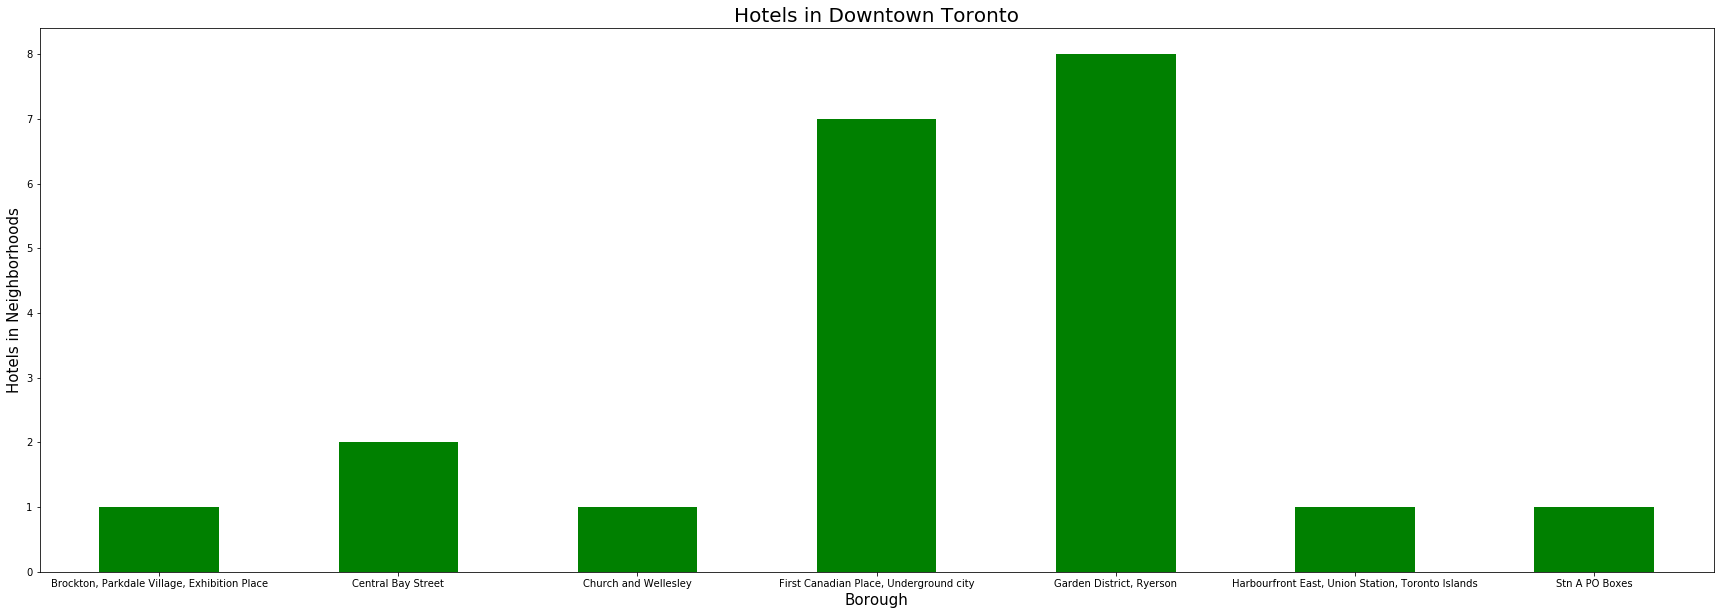

In [47]:
Toronto_Hotel_filtered.groupby('Neighborhood')['Borough'].count().plot.bar(figsize=(30,10), color="green") #Plotting the Bar graph
plt.title('Hotels in Downtown Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Hotels in Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()


In [48]:
def venue_rating(id): 

    venue_id = id
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
           venue_id,
           CLIENT_ID, 
           CLIENT_SECRET, 
           VERSION)

    result = requests.get(url).json()
    try:
        venue_ratings = result['response']['venue']['rating']
    except:
        venue_ratings = 0
        
    return venue_ratings 

In [49]:
Rating = []
for i in Toronto_Hotel_filtered['id']:
    k = venue_rating(i)
    Rating.append(k)
    
    
   
    
 

In [50]:
Rating

[6.9,
 8.4,
 6.4,
 7.5,
 7.7,
 6.4,
 0,
 5.4,
 6.4,
 6.2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8.3,
 6.6,
 0,
 8.2]

In [52]:
Toronto_Hotel_filtered['venue_rating'] = Rating # Adding an extra column to the Dataframe
Toronto_Hotel_filtered

,name,id,Borough,Neighborhood,venue_rating
0,Sheraton Centre Toronto Hotel,4ab2d511f964a5209b6c20e3,Downtown Toronto,"First Canadian Place, Underground city",6.9
1,The Omni King Edward Hotel,4adf7d0bf964a520127b21e3,Downtown Toronto,"First Canadian Place, Underground city",8.4
2,Pantages Hotel & Spa,4ae61cf6f964a520caa421e3,Downtown Toronto,"First Canadian Place, Underground city",6.4
3,One King West Hotel & Residence,4af96fbbf964a520c01122e3,Downtown Toronto,"First Canadian Place, Underground city",7.5
4,Cosmopolitan Toronto Centre Hotel & Spa,4ad4c05cf964a520bbf520e3,Downtown Toronto,"First Canadian Place, Underground city",7.7
5,Hotel Victoria,4ad4c05cf964a520b4f520e3,Downtown Toronto,"First Canadian Place, Underground city",6.4
6,Cambridge Suits Hotel,52ecf91c11d2a13402bd0fd7,Downtown Toronto,"First Canadian Place, Underground city",0.0
7,Bond Place Hotel,4ad4c05bf964a520a3f520e3,Downtown Toronto,"Garden District, Ryerson",5.4
8,Chelsea Hotel,51d212c3498ebf27dc469bc9,Downtown Toronto,"Garden District, Ryerson",6.4
9,Crew Room Eaton Chelsea Hotel,51e48697498eded9073c6c17,Downtown Toronto,"Garden District, Ryerson",6.2


In [53]:
Toronto_Hotel_filtered.to_csv('Toronto_Hotel_filtered_csv.csv') # Storing as a csv file


In [54]:
Toronto_Hotel_filtered.sort_values(by = 'venue_rating', ascending = False) # Sorting the values based on venue_rating

,name,id,Borough,Neighborhood,venue_rating
1,The Omni King Edward Hotel,4adf7d0bf964a520127b21e3,Downtown Toronto,"First Canadian Place, Underground city",8.4
17,Le Germain Hotel,4cb87a334c60a093c04a39ca,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",8.3
20,Gladstone Hotel,4ad4c05cf964a520c0f520e3,West Toronto,"Brockton, Parkdale Village, Exhibition Place",8.2
4,Cosmopolitan Toronto Centre Hotel & Spa,4ad4c05cf964a520bbf520e3,Downtown Toronto,"First Canadian Place, Underground city",7.7
3,One King West Hotel & Residence,4af96fbbf964a520c01122e3,Downtown Toronto,"First Canadian Place, Underground city",7.5
0,Sheraton Centre Toronto Hotel,4ab2d511f964a5209b6c20e3,Downtown Toronto,"First Canadian Place, Underground city",6.9
18,Isabella Hotel,4bc0ed99461576b080137b32,Downtown Toronto,Church and Wellesley,6.6
8,Chelsea Hotel,51d212c3498ebf27dc469bc9,Downtown Toronto,"Garden District, Ryerson",6.4
5,Hotel Victoria,4ad4c05cf964a520b4f520e3,Downtown Toronto,"First Canadian Place, Underground city",6.4
2,Pantages Hotel & Spa,4ae61cf6f964a520caa421e3,Downtown Toronto,"First Canadian Place, Underground city",6.4


In [55]:
Toronto_Hotel_filtered= Toronto_Hotel_filtered.reset_index(drop = True) #Resetting the values of the Dataframe

In [56]:
Toronto_Hotel_filtered

,name,id,Borough,Neighborhood,venue_rating
0,Sheraton Centre Toronto Hotel,4ab2d511f964a5209b6c20e3,Downtown Toronto,"First Canadian Place, Underground city",6.9
1,The Omni King Edward Hotel,4adf7d0bf964a520127b21e3,Downtown Toronto,"First Canadian Place, Underground city",8.4
2,Pantages Hotel & Spa,4ae61cf6f964a520caa421e3,Downtown Toronto,"First Canadian Place, Underground city",6.4
3,One King West Hotel & Residence,4af96fbbf964a520c01122e3,Downtown Toronto,"First Canadian Place, Underground city",7.5
4,Cosmopolitan Toronto Centre Hotel & Spa,4ad4c05cf964a520bbf520e3,Downtown Toronto,"First Canadian Place, Underground city",7.7
5,Hotel Victoria,4ad4c05cf964a520b4f520e3,Downtown Toronto,"First Canadian Place, Underground city",6.4
6,Cambridge Suits Hotel,52ecf91c11d2a13402bd0fd7,Downtown Toronto,"First Canadian Place, Underground city",0.0
7,Bond Place Hotel,4ad4c05bf964a520a3f520e3,Downtown Toronto,"Garden District, Ryerson",5.4
8,Chelsea Hotel,51d212c3498ebf27dc469bc9,Downtown Toronto,"Garden District, Ryerson",6.4
9,Crew Room Eaton Chelsea Hotel,51e48697498eded9073c6c17,Downtown Toronto,"Garden District, Ryerson",6.2


In [57]:
Toronto_Hotel_filtered.sort_values(by = 'venue_rating', ascending = False) # Sorting based on the venue_rating


,name,id,Borough,Neighborhood,venue_rating
1,The Omni King Edward Hotel,4adf7d0bf964a520127b21e3,Downtown Toronto,"First Canadian Place, Underground city",8.4
17,Le Germain Hotel,4cb87a334c60a093c04a39ca,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",8.3
20,Gladstone Hotel,4ad4c05cf964a520c0f520e3,West Toronto,"Brockton, Parkdale Village, Exhibition Place",8.2
4,Cosmopolitan Toronto Centre Hotel & Spa,4ad4c05cf964a520bbf520e3,Downtown Toronto,"First Canadian Place, Underground city",7.7
3,One King West Hotel & Residence,4af96fbbf964a520c01122e3,Downtown Toronto,"First Canadian Place, Underground city",7.5
0,Sheraton Centre Toronto Hotel,4ab2d511f964a5209b6c20e3,Downtown Toronto,"First Canadian Place, Underground city",6.9
18,Isabella Hotel,4bc0ed99461576b080137b32,Downtown Toronto,Church and Wellesley,6.6
8,Chelsea Hotel,51d212c3498ebf27dc469bc9,Downtown Toronto,"Garden District, Ryerson",6.4
5,Hotel Victoria,4ad4c05cf964a520b4f520e3,Downtown Toronto,"First Canadian Place, Underground city",6.4
2,Pantages Hotel & Spa,4ae61cf6f964a520caa421e3,Downtown Toronto,"First Canadian Place, Underground city",6.4


In [58]:
Toronto_Hotel_filtered

,name,id,Borough,Neighborhood,venue_rating
0,Sheraton Centre Toronto Hotel,4ab2d511f964a5209b6c20e3,Downtown Toronto,"First Canadian Place, Underground city",6.9
1,The Omni King Edward Hotel,4adf7d0bf964a520127b21e3,Downtown Toronto,"First Canadian Place, Underground city",8.4
2,Pantages Hotel & Spa,4ae61cf6f964a520caa421e3,Downtown Toronto,"First Canadian Place, Underground city",6.4
3,One King West Hotel & Residence,4af96fbbf964a520c01122e3,Downtown Toronto,"First Canadian Place, Underground city",7.5
4,Cosmopolitan Toronto Centre Hotel & Spa,4ad4c05cf964a520bbf520e3,Downtown Toronto,"First Canadian Place, Underground city",7.7
5,Hotel Victoria,4ad4c05cf964a520b4f520e3,Downtown Toronto,"First Canadian Place, Underground city",6.4
6,Cambridge Suits Hotel,52ecf91c11d2a13402bd0fd7,Downtown Toronto,"First Canadian Place, Underground city",0.0
7,Bond Place Hotel,4ad4c05bf964a520a3f520e3,Downtown Toronto,"Garden District, Ryerson",5.4
8,Chelsea Hotel,51d212c3498ebf27dc469bc9,Downtown Toronto,"Garden District, Ryerson",6.4
9,Crew Room Eaton Chelsea Hotel,51e48697498eded9073c6c17,Downtown Toronto,"Garden District, Ryerson",6.2


In [59]:
Toronto_Hotel_filtered= Toronto_Hotel_filtered.reset_index(drop = True)

In [60]:
Toronto_Hotel_filtered

,name,id,Borough,Neighborhood,venue_rating
0,Sheraton Centre Toronto Hotel,4ab2d511f964a5209b6c20e3,Downtown Toronto,"First Canadian Place, Underground city",6.9
1,The Omni King Edward Hotel,4adf7d0bf964a520127b21e3,Downtown Toronto,"First Canadian Place, Underground city",8.4
2,Pantages Hotel & Spa,4ae61cf6f964a520caa421e3,Downtown Toronto,"First Canadian Place, Underground city",6.4
3,One King West Hotel & Residence,4af96fbbf964a520c01122e3,Downtown Toronto,"First Canadian Place, Underground city",7.5
4,Cosmopolitan Toronto Centre Hotel & Spa,4ad4c05cf964a520bbf520e3,Downtown Toronto,"First Canadian Place, Underground city",7.7
5,Hotel Victoria,4ad4c05cf964a520b4f520e3,Downtown Toronto,"First Canadian Place, Underground city",6.4
6,Cambridge Suits Hotel,52ecf91c11d2a13402bd0fd7,Downtown Toronto,"First Canadian Place, Underground city",0.0
7,Bond Place Hotel,4ad4c05bf964a520a3f520e3,Downtown Toronto,"Garden District, Ryerson",5.4
8,Chelsea Hotel,51d212c3498ebf27dc469bc9,Downtown Toronto,"Garden District, Ryerson",6.4
9,Crew Room Eaton Chelsea Hotel,51e48697498eded9073c6c17,Downtown Toronto,"Garden District, Ryerson",6.2


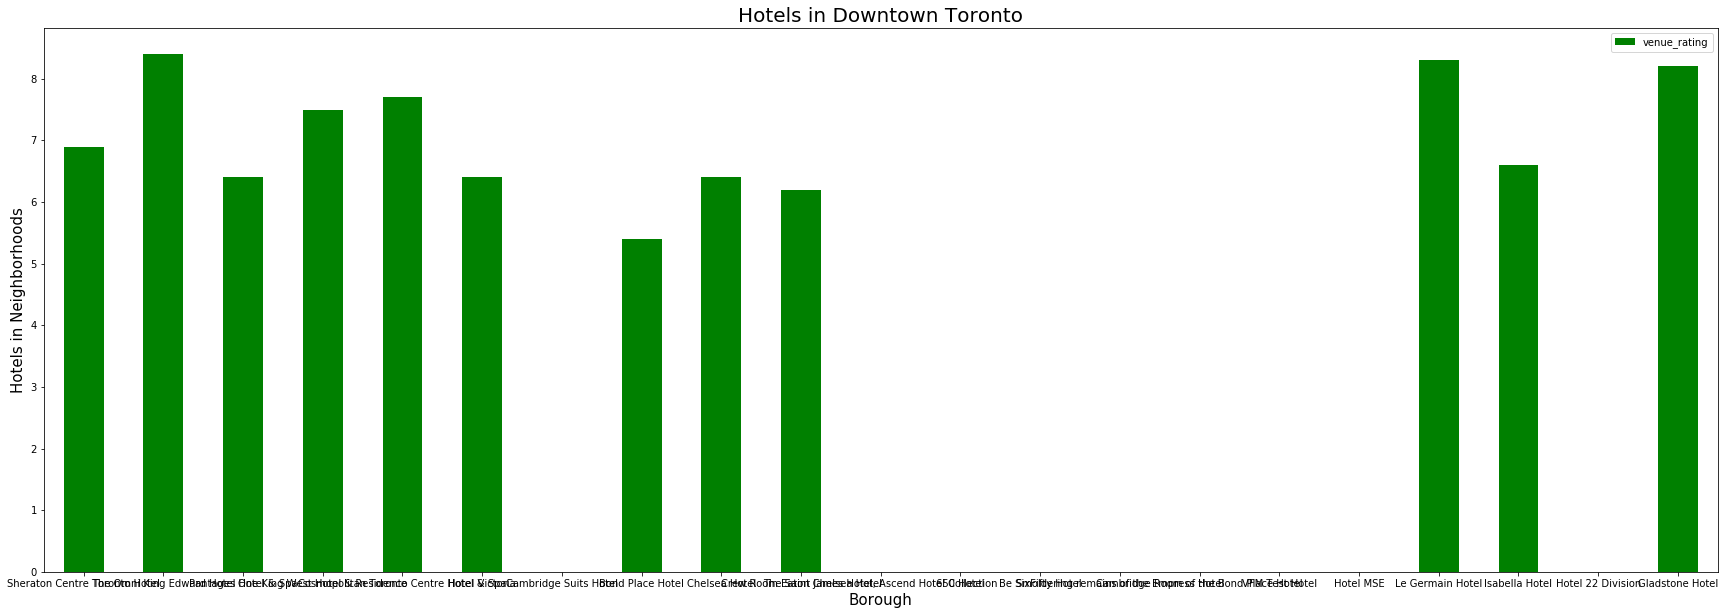

In [61]:
Toronto_Hotel_filtered.plot(kind = 'bar', figsize = (30,10), x = 'name', y = 'venue_rating', color = "green") # Plotting the Bar graph
plt.title('Hotels in Downtown Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Hotels in Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()


###### Conclusion
Toronto is a beautiful city attracting lots of visitors from around the world and lot of people visit the city for business trips. The best Hotels to stay in Toronto are located at the Financial District with lot of connectivity to all parts of the city. Downtown Toronto can be reachable from Pearson International Airport. Union Pearson Express runs from Pearson airport to Union Station in Downtown Toronto in just 25 minutes. Underground city is also located in Financial District and has a lot of shopping areas. 
The best area to open a hotel in downtown Toronto are close to 

1. University of Toronto surroundings as it one of the most reputed universities in the world and lot of people visit for academic purposes
2. Harbourfront area as this is close to Toronto islands and can make choice of many tourists and can provide views of lake Ontario